<a href="https://colab.research.google.com/github/harnett1/me133a/blob/test-gazebo/plot_trajectories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

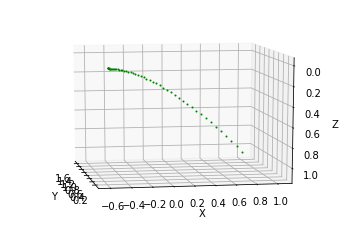

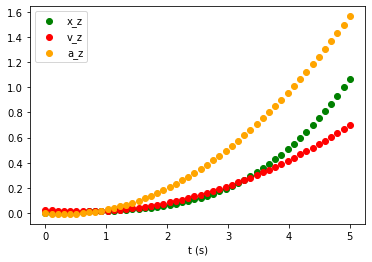

In [66]:
import matplotlib.pyplot as plt
import numpy as np

N = 3 # degree of polynomial
      # N = 5 seems problematic for the robot

def getSplineCoeffs(t_vals, coord_vals):
    # Calculates the spline coefficients for a given set of points along a path
    # in the form of s(t) = c_x_n * t^n + c_x_n-1 * t^(n+1) + ... + c_x_0
    # using linear regression to minimize the error, e = s - t * c, for each term
    # being a matrix.
    # The error is minimized by c_x = pinv(t_x) * x, similar for c_y and c_z
    t_matrix = []
    t_vals = t_vals.tolist()
    for t in t_vals:
        row = []
        for deg in range(N+1):
            row.append(t ** deg)
        t_matrix.append(row)
    t_matrix = np.array(t_matrix)
    coeffs = np.linalg.pinv(t_matrix) @ np.array(coord_vals)
    return coeffs


A_matrix = np.array([[0.0, -0.6, 0.1, 0.0],
                    [0.5, -0.57, 0.12, 0.01],
                    [1.0, -0.55, 0.15, 0.02],
                    [2.0, -0.4, 0.3, 0.05],
                    [2.3, -0.3, 0.4, 0.1],
                    [2.75, -0.15, 0.55, 0.15],
                    [2.8, -0.13, 0.57, 0.17],
                    [3.0, -0.1, 0.6, 0.2]])


x_vals = []
v_vals = []
a_vals = []
t_vals = np.linspace(0, 5, 50)

fig = plt.figure()
fig2 = plt.figure()
ax = fig.add_subplot(projection='3d')
ax2 = fig2.add_subplot(1, 1, 1)
# ax.plot(A_matrix[:,1], A_matrix[:,2], A_matrix[:,3])
for t in t_vals:
  c_x = getSplineCoeffs(A_matrix[:, 0], A_matrix[:, 1])
  c_z = getSplineCoeffs(A_matrix[:, 0], A_matrix[:, 3])
  c_y = getSplineCoeffs(A_matrix[:, 0], A_matrix[:, 2])
  c_x_vel = [c_x[n] for n in range(N+1)]
  c_y_vel = [c_y[n] for n in range(N+1)]
  c_z_vel = [c_z[n] for n in range(N+1)]
  # print('c_x')
  # print(c_x.tolist())
  # print('end')
  x_x = 0
  x_y = 0
  x_z = 0
  v_x = 0
  v_y = 0
  v_z = 0
  a_x = 0
  a_y = 0
  a_z = 0
  for deg in range(N+1):
    # position
    x_x += c_x.tolist()[deg] * t ** deg
    x_y += c_y.tolist()[deg] * t ** deg
    x_z += c_z.tolist()[deg] * t ** deg
    if deg != 0: # velocity
        v_x += c_x.tolist()[deg] * deg * t ** (deg - 1)
        v_y += c_y.tolist()[deg] * deg * t ** (deg - 1)
        v_z += c_z.tolist()[deg] * deg * t ** (deg - 1)  
    if deg != 1 and deg != 0: # acceleration
        a_x += c_x.tolist()[deg] * deg * (deg - 1) * t ** (deg - 1)
        a_y += c_y.tolist()[deg] * deg * (deg - 1) * t ** (deg - 1)
        a_z += c_z.tolist()[deg] * deg * (deg - 1) * t ** (deg - 1) 
  x = np.array([x_x, x_y, x_z]).reshape(3,1)
  xdot = np.array([v_x, v_y, v_z]).reshape(3, 1)
  xddot = np.array([a_x, a_y, a_z]).reshape(3, 1)

  x_vals.append(x.flatten())
  v_vals.append(xdot.flatten())
  a_vals.append(xddot.flatten())

  ax.scatter(x_y, x_x, x_z, color='green', s=1)
  ax2.scatter(t, x_z, color='green')
  ax2.scatter(t, v_z, color='red')
  ax2.scatter(t, a_z, color='orange')

#ax.view_init(-170, 180)
ax.view_init(-170, 10)
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('Z')
ax2.set_xlabel('t (s)')
ax2.legend(['x_z', 'v_z', 'a_z'])

plt.show()

